In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('shift_ml_2025_train.csv')
target = df['итоговый_статус_займа']

In [ ]:
df['годовой_доход'].describe()

In [ ]:
df['годовой_доход'] = df['годовой_доход'].fillna(df['годовой_доход'].median())
#Но их нету

In [ ]:
#3. Как выбрать строки, где итоговый_статус_займа = 1?
df[df['итоговый_статус_займа'] == 1]
df.query("итоговый_статус_займа == 1")
df.loc[df['итоговый_статус_займа'] == 1]

In [ ]:
#4. Как посчитать корреляцию между сумма_займа и годовой_доход?
df['сумма_займа'].corr(df['годовой_доход'])
df[['сумма_займа', 'годовой_доход']].corr()

In [ ]:
#5. Напишите код, чтобы вывести средний итоговый_статус_займа в зависимости от рейтинга:
result=df.groupby('рейтинг')['итоговый_статус_займа'].mean()
result

In [ ]:
#Как рассчитать 3-месячное скользящее среднее признака сумма_дефолта с группировкой по регионам?
#Не по нашим данным, но 2ой вариант должен работать
#df.set_index('дата_выдачи_займа').groupby('регион')['сумма_дефолта'].rolling('90D').mean()

In [ ]:
df.head()

In [ ]:
#7. Чему равна средняя сумма займа инженеров с рейтингом - Б?
result = (
    df.groupby(['рейтинг', 'профессия_заемщика'])['сумма_займа']
    .mean()
    .reset_index()  # Преобразуем MultiIndex в столбцы
    .query("профессия_заемщика == 'инженер'")  # Фильтруем только инженеров
)
result

In [5]:
#8. В какой фиче наибольшее число пропусков?
missing=df.isnull().sum().sort_values()
missing

id                                                                        0
коэфф_невыплаченного_сумм_остатка                                         0
коэфф_исходного_платежа                                                   0
дата_первого_займа                                                        0
нижний_порог_рейтинга_заемщика                                            0
верхний_порог_рейтинга_заемщика                                           0
кол-во_открытых_счетов                                                    0
кол-во_записей_в_общедоступных_документах                                 0
оборотный_баланс                                                          0
кол-во_счетов                                                             0
первоначальный_статус_займа                                               0
непогашенная_сумма_из_тела_займов                                         0
сумма_выплат_по_просрочкам                                                0
грейд_на_дет

In [7]:
#9. Какие значения есть у признака тип_предоставления_кредита?
df['тип_предоставления_кредита'].unique()

array(['Наличные', 'Перевод'], dtype=object)

In [8]:
#10
from scipy.stats import ttest_ind
group_1 = df[(df['рейтинг'] == 'Ж') & (df['итоговый_статус_займа'] == 1)]['сумма_займа']
group_0 = df[(df['рейтинг'] == 'Ж') & (df['итоговый_статус_займа'] == 0)]['сумма_займа']

In [9]:
from scipy.stats import shapiro

_, p1 = shapiro(group_1)
_, p0 = shapiro(group_0)

print(f"p-значение для группы 1 (нормальность): {p1:.3f}")
print(f"p-значение для группы 0 (нормальность): {p0:.3f}")

p-значение для группы 1 (нормальность): 0.000
p-значение для группы 0 (нормальность): 0.000


In [10]:
from scipy.stats import levene

_, p_levene = levene(group_1, group_0)
print(f"p-значение теста Левена: {p_levene:.3f}")

p-значение теста Левена: 0.005


In [15]:
group_0.shape


(4118,)

In [16]:
group_1.shape

(4074,)

In [11]:
t_stat, p_value = ttest_ind(group_1, group_0, equal_var=False)
print(f"t-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")

t-статистика: -0.974
p-значение: 0.330


In [ ]:
#Не отвергаем нулевую гипотезу о равенстве средних сумм займа между группами (p = 0.33 > 0.05). Статистически значимых различий не обнаружено.

In [ ]:
#11. Какой код построит boxplot для сравнения годового_дохода по статусу займа?
sns.boxplot(x='итоговый_статус_займа', y='годовой_доход', data=df)
#df.groupby('итоговый_статус_займа')['годовой_доход'].boxplot() технически подходит но не сравнивает

In [ ]:
#12. Какой из следующих сценариев возможен для бинарной классификации, если ROC AUC = 0.65, но при этом accuracy модели на тестовой выборке составляет 0.95?
#Сильный дисбаланс классов.


In [ ]:
#13. Вы тестируете несколько моделей бинарной классификации. Значение ROC AUC какой модели указывает на наилучшее качество предсказаний
#0.9

<Axes: xlabel='рейтинг', ylabel='сумма_займа_стандарт'>

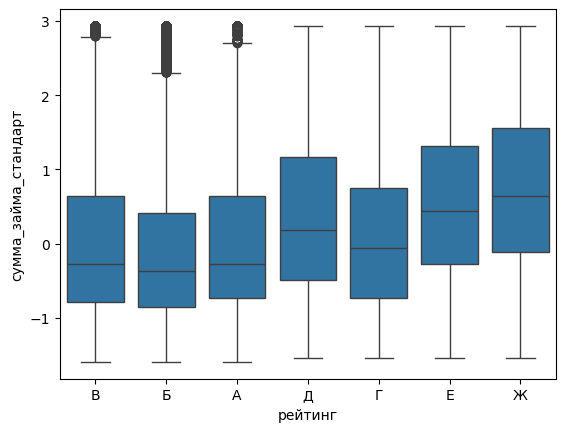

In [ ]:
sns.boxplot(x='рейтинг', y='сумма_займа', data=df)